#Install H2O

In [2]:
! apt-get install default-jre
! javar-version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  adwaita-icon-theme at-spi2-core ca-certificates-java dbus
  default-jre-headless fontconfig fonts-dejavu-extra gtk-update-icon-cache
  hicolor-icon-theme humanity-icon-theme java-common libapparmor1 libasound2
  libasound2-data libasyncns0 libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libavahi-client3 libavahi-common-data libavahi-common3 libcairo2 libcroco3
  libcups2 libdatrie1 libdbus-1-3 libdrm-amdgpu1 libdrm-common libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libdrm2 libelf1 libflac8 libfontenc1
  libgail-common libgail18 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin
  libgdk-pixbuf2.0-common libgif7 libgl1-mesa-dri libgl1-mesa-glx
  libglapi-mesa libgraphite2-3 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libharfbuzz0b libjbig0 liblcms2-2 libllvm5.0 libnspr4 libnss3 libogg0


# H2O AutoML Binary Classification Demo

This is a [Jupyter](https://jupyter.org/) Notebook. When you execute code within the notebook, the results appear beneath the code. To execute a code chunk, place your cursor on the cell and press *Shift+Enter*. 

### Start H2O

Import the **h2o** Python module and `H2OAutoML` class and initialize a local H2O cluster.

In [5]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.17.10.1-b11); OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo3l6znzp
  JVM stdout: /tmp/tmpo3l6znzp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo3l6znzp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_unknownUser_gu5cy5
H2O cluster total nodes:,1
H2O cluster free memory:,2.827 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


### Load Data

For the AutoML binary classification demo, we use a subset of the [Product Backorders](https://www.kaggle.com/tiredgeek/predict-bo-trial/data) dataset.  The goal here is to predict whether or not a product will be put on backorder status, given a number of product metrics such as current inventory, transit time, demand forecasts and prior sales.

In [6]:
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"


# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


For classification, the response should be encoded as categorical (aka. "factor" or "enum"). Let's take a look.

In [7]:
df.describe()

Rows:19053
Cols:23




,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.76056264,376.36702881436014,7.706036161335188,48.272345562378625,182.91082769117727,344.739830997743,497.79242114102766,56.11887891670605,168.53445651603428,333.53219965359773,504.2553928515193,48.84070750013117,,2.3114995013908572,-6.519833622001783,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498688,7002.071628662688,6.778665072124189,1465.9992102068293,4304.865591970626,8406.062155159243,12180.570042918358,1544.2177775482573,4581.340080221506,9294.566153218986,14184.14539565363,968.7738680675265,,110.24106014611986,25.975138766871876,25.184497150032527,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


We will notice that the response column, `"went_on_backorder"`, is already encoded as "enum", so there's nothing we need to do here.  If it were encoded as a 0/1 "int", then we'd have to convert the column as follows:  `df[y] = df[y].asfactor()`


Next, let's identify the response & predictor columns by saving them as `x` and `y`.  The `"sku"` column is a unique identifier so we'll want to remove that from the set of our predictors.

In [0]:
y = "went_on_backorder"
x = df.columns
x.remove(y)
x.remove("sku")

## Run AutoML 

Run AutoML, stopping after 10 models.  The `max_models` argument specifies the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [9]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


*Note: If you see the following error, it means that you need to install the pandas module.*
```
H2OTypeError: Argument `python_obj` should be a None | list | tuple | dict | numpy.ndarray | pandas.DataFrame | scipy.sparse.issparse, got H2OTwoDimTable 
``` 

## Leaderboard

Next, we will view the AutoML Leaderboard.  Since we did not specify a `leaderboard_frame` in the `H2OAutoML.train()` method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.  

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.  In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC).  In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at `aml.leader` and the leaderboard is stored at `aml.leaderboard`.

In [0]:
lb = aml.leaderboard

Now we will view a snapshot of the top models.  Here we should see the two Stacked Ensembles at or near the top of the leaderboard.  Stacked Ensembles can almost always outperform a single model.

In [11]:
lb.head()

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_0_AutoML_20180927_015343,0.949138,0.185543,0.134196,0.231418,0.0535543
StackedEnsemble_BestOfFamily_0_AutoML_20180927_015343,0.947393,0.18747,0.152632,0.232216,0.0539243
GBM_grid_0_AutoML_20180927_015343_model_3,0.947208,0.176378,0.157649,0.228873,0.0523827
GBM_grid_0_AutoML_20180927_015343_model_4,0.94696,0.177442,0.15057,0.230722,0.0532325
GBM_grid_0_AutoML_20180927_015343_model_2,0.946714,0.179055,0.156244,0.230244,0.0530125
GBM_grid_0_AutoML_20180927_015343_model_1,0.944134,0.182077,0.154442,0.231947,0.0537993
GBM_grid_0_AutoML_20180927_015343_model_0,0.940676,0.186094,0.157279,0.233823,0.0546734
XRT_0_AutoML_20180927_015343,0.935131,0.206344,0.183779,0.247005,0.0610115
GBM_grid_0_AutoML_20180927_015343_model_5,0.930832,0.347137,0.161565,0.317575,0.100854
DRF_0_AutoML_20180927_015343,0.92448,0.223535,0.191417,0.256655,0.0658716


To view the entire leaderboard, specify the `rows` argument of the `head()` method as the total number of rows:

In [12]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_0_AutoML_20180927_015343,0.949138,0.185543,0.134196,0.231418,0.0535543
StackedEnsemble_BestOfFamily_0_AutoML_20180927_015343,0.947393,0.18747,0.152632,0.232216,0.0539243
GBM_grid_0_AutoML_20180927_015343_model_3,0.947208,0.176378,0.157649,0.228873,0.0523827
GBM_grid_0_AutoML_20180927_015343_model_4,0.94696,0.177442,0.15057,0.230722,0.0532325
GBM_grid_0_AutoML_20180927_015343_model_2,0.946714,0.179055,0.156244,0.230244,0.0530125
GBM_grid_0_AutoML_20180927_015343_model_1,0.944134,0.182077,0.154442,0.231947,0.0537993
GBM_grid_0_AutoML_20180927_015343_model_0,0.940676,0.186094,0.157279,0.233823,0.0546734
XRT_0_AutoML_20180927_015343,0.935131,0.206344,0.183779,0.247005,0.0610115
GBM_grid_0_AutoML_20180927_015343_model_5,0.930832,0.347137,0.161565,0.317575,0.100854
DRF_0_AutoML_20180927_015343,0.92448,0.223535,0.191417,0.256655,0.0658716


## Ensemble Exploration

To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model.  The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run.  This is often the top performing model on the leaderboard.

In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(aml.leader.metalearner()['name'])

metalearner

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  metalearner_AUTO_StackedEnsemble_AllModels_0_AutoML_20180927_015343


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.053351431943969234
RMSE: 0.23097928899355724
LogLoss: 0.184845145490698
Null degrees of freedom: 15175
Residual degrees of freedom: 15168
Null deviance: 11088.51899082825
Residual deviance: 5610.419855933666
AIC: 5626.419855933666
AUC: 0.949589206821598
Gini: 0.899178413643196
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1828196191434616: 


,No,Yes,Error,Rate
No,12561.0,806.0,0.0603,(806.0/13367.0)
Yes,389.0,1420.0,0.215,(389.0/1809.0)
Total,12950.0,2226.0,0.0787,(1195.0/15176.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1828196,0.7038414,264.0
max f2,0.0930396,0.7802895,308.0
max f0point5,0.6426383,0.7190994,120.0
max accuracy,0.4834969,0.9289009,165.0
max precision,0.9868438,1.0,0.0
max recall,0.0193218,1.0,388.0
max specificity,0.9868438,1.0,0.0
max absolute_mcc,0.1828196,0.6637077,264.0
max min_per_class_accuracy,0.0736417,0.8855390,321.0
max mean_per_class_accuracy,0.0848414,0.8873488,313.0


Gains/Lift Table: Avg response rate: 11.92 %, avg score: 11.92 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100158,0.9575698,7.5612871,7.5612871,0.9013158,0.9703800,0.9013158,0.9703800,0.0757324,0.0757324,656.1287132,656.1287132
,2,0.0200316,0.9286302,7.1749440,7.3681156,0.8552632,0.9424285,0.8782895,0.9564043,0.0718629,0.1475954,617.4943993,636.8115563
,3,0.0300474,0.9035231,7.0645602,7.2669305,0.8421053,0.9159512,0.8662281,0.9429199,0.0707573,0.2183527,606.4560240,626.6930455
,4,0.0400633,0.8687733,6.8437927,7.1611460,0.8157895,0.8868636,0.8536184,0.9289058,0.0685462,0.2868988,584.3792732,616.1146024
,5,0.0500132,0.8215879,6.2224272,6.9743917,0.7417219,0.8466903,0.8313570,0.9125494,0.0619127,0.3488115,522.2427231,597.4391693
,6,0.1000264,0.4590192,5.4490889,6.2117403,0.6495389,0.6546334,0.7404480,0.7835914,0.2725263,0.6213378,444.9088914,521.1740303
,7,0.1500395,0.1723697,3.4374577,5.2869794,0.4097497,0.2909299,0.6302152,0.6193709,0.1719182,0.7932559,243.7457712,428.6979439
,8,0.2000527,0.0796376,1.7684670,4.4073513,0.2108037,0.1162883,0.5253623,0.4936002,0.0884467,0.8817026,76.8466990,340.7351327
,9,0.3000132,0.0368514,0.6193715,3.1452460,0.0738299,0.0520144,0.3749176,0.3464696,0.0619127,0.9436153,-38.0628535,214.5246023
,10,0.4000395,0.0271879,0.2984288,2.4334245,0.0355731,0.0310580,0.2900675,0.2676037,0.0298507,0.9734660,-70.1571195,143.3424488




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.0494122919859277
RMSE: 0.22228875811864102
LogLoss: 0.1754894686411851
Null degrees of freedom: 3876
Residual degrees of freedom: 3869
Null deviance: 2812.1996455253825
Residual deviance: 1360.7453398437494
AIC: 1376.7453398437494
AUC: 0.9478588429498254
Gini: 0.8957176858996507
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4220466895573338: 


,No,Yes,Error,Rate
No,3337.0,83.0,0.0243,(83.0/3420.0)
Yes,153.0,304.0,0.3348,(153.0/457.0)
Total,3490.0,387.0,0.0609,(236.0/3877.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4220467,0.7203791,177.0
max f2,0.0717774,0.7741935,310.0
max f0point5,0.4896415,0.7617290,161.0
max accuracy,0.4220467,0.9391282,177.0
max precision,0.9864735,1.0,0.0
max recall,0.0155236,1.0,399.0
max specificity,0.9864735,1.0,0.0
max absolute_mcc,0.4220467,0.6894767,177.0
max min_per_class_accuracy,0.0746858,0.8859649,308.0
max mean_per_class_accuracy,0.0717774,0.8880562,310.0


Gains/Lift Table: Avg response rate: 11.79 %, avg score: 11.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100593,0.9576344,7.3959491,7.3959491,0.8717949,0.9690874,0.8717949,0.9690874,0.0743982,0.0743982,639.5949055,639.5949055
,2,0.0201186,0.9292327,7.6134770,7.5047130,0.8974359,0.9445435,0.8846154,0.9568154,0.0765864,0.1509847,661.3476968,650.4713011
,3,0.0301780,0.8967482,8.2660607,7.7584956,0.9743590,0.9162872,0.9145299,0.9433060,0.0831510,0.2341357,726.6060708,675.8495577
,4,0.0402373,0.8618017,7.3959491,7.6678589,0.8717949,0.8791275,0.9038462,0.9272614,0.0743982,0.3085339,639.5949055,666.7858946
,5,0.0500387,0.8173816,6.4743176,7.4340725,0.7631579,0.8420898,0.8762887,0.9105783,0.0634573,0.3719912,547.4317632,643.4072503
,6,0.1000774,0.4103839,5.8597983,6.6469354,0.6907216,0.6365908,0.7835052,0.7735845,0.2932166,0.6652079,485.9798326,564.6935415
,7,0.1501161,0.1687484,2.4926008,5.2621572,0.2938144,0.2668053,0.6202749,0.6046581,0.1247265,0.7899344,149.2600781,426.2157203
,8,0.2001548,0.0785314,1.7491935,4.3839163,0.2061856,0.1159953,0.5167526,0.4824924,0.0875274,0.8774617,74.9193530,338.3916285
,9,0.2999742,0.0363669,0.6795639,3.1512556,0.0801034,0.0513920,0.3714531,0.3390394,0.0678337,0.9452954,-32.0436054,215.1255619
,10,0.4000516,0.0276133,0.2186492,2.4176313,0.0257732,0.0314579,0.2849774,0.2620944,0.0218818,0.9671772,-78.1350809,141.7631316




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.05355429818205666
RMSE: 0.23141801611382087
LogLoss: 0.18554324085358226
Null degrees of freedom: 15175
Residual degrees of freedom: 15167
Null deviance: 11088.668423692718
Residual deviance: 5631.608446387931
AIC: 5649.608446387931
AUC: 0.9491381483975185
Gini: 0.8982762967950371
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1698493994542788: 


,No,Yes,Error,Rate
No,12506.0,861.0,0.0644,(861.0/13367.0)
Yes,369.0,1440.0,0.204,(369.0/1809.0)
Total,12875.0,2301.0,0.081,(1230.0/15176.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1698494,0.7007299,265.0
max f2,0.0890872,0.7780951,308.0
max f0point5,0.6037337,0.7167858,135.0
max accuracy,0.5034346,0.9284396,161.0
max precision,0.9877437,1.0,0.0
max recall,0.0187995,1.0,389.0
max specificity,0.9877437,1.0,0.0
max absolute_mcc,0.1698494,0.6609711,265.0
max min_per_class_accuracy,0.0733668,0.8856886,318.0
max mean_per_class_accuracy,0.0802705,0.8871369,313.0


Gains/Lift Table: Avg response rate: 11.92 %, avg score: 11.93 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100158,0.9580885,7.5612871,7.5612871,0.9013158,0.9704373,0.9013158,0.9704373,0.0757324,0.0757324,656.1287132,656.1287132
,2,0.0200316,0.9287283,7.0093684,7.2853277,0.8355263,0.9430336,0.8684211,0.9567355,0.0702045,0.1459370,600.9368363,628.5327747
,3,0.0300474,0.9033086,7.1197521,7.2301359,0.8486842,0.9162946,0.8618421,0.9432552,0.0713101,0.2172471,611.9752117,623.0135870
,4,0.0400633,0.8691919,6.7334090,7.1059541,0.8026316,0.8868025,0.8470395,0.9291420,0.0674406,0.2846877,573.3408978,610.5954147
,5,0.0500132,0.8229806,6.3335420,6.9522859,0.7549669,0.8476032,0.8287220,0.9129202,0.0630182,0.3477059,533.3542003,595.2285855
,6,0.1000264,0.4573074,5.3938243,6.1730551,0.6429513,0.6552028,0.7358366,0.7840615,0.2697623,0.6174682,439.3824320,517.3055088
,7,0.1500395,0.1732340,3.4485106,5.2648736,0.4110672,0.2905486,0.6275801,0.6195572,0.1724710,0.7899392,244.8510631,426.4873602
,8,0.2000527,0.0791342,1.8347845,4.4073513,0.2187088,0.1161874,0.5253623,0.4937148,0.0917634,0.8817026,83.4784502,340.7351327
,9,0.3000132,0.0368165,0.6193715,3.1452460,0.0738299,0.0519999,0.3749176,0.3465411,0.0619127,0.9436153,-38.0628535,214.5246023
,10,0.4000395,0.0271847,0.2763230,2.4278971,0.0329381,0.0310966,0.2894087,0.2676670,0.0276396,0.9712548,-72.3677033,142.7897118



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9243299,0.0032083,0.9217221,0.9176277,0.9303899,0.9281003,0.9238095
auc,0.9492246,0.0046000,0.9435919,0.9436383,0.9532505,0.9601215,0.9455208
err,0.0756701,0.0032083,0.0782779,0.0823723,0.0696101,0.0718997,0.0761905
err_count,229.6,9.355212,240.0,250.0,216.0,218.0,224.0
f0point5,0.6766273,0.0122512,0.6668283,0.6497696,0.7013575,0.6832448,0.6819365
---,---,---,---,---,---,---,---
r2,0.4907887,0.0128541,0.4709241,0.4802184,0.5053698,0.5188112,0.4786200
recall,0.7635091,0.0156638,0.7513661,0.7790055,0.7560976,0.7971831,0.7338936
residual_deviance,1125.8235,33.28111,1189.9716,1147.3503,1112.9067,1046.5245,1132.3643
rmse,0.2312070,0.0035844,0.2358355,0.2336714,0.2276518,0.2230319,0.2358447



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-09-27 01:58:02,0.000 sec,1,.46E0,1,0.7306615,0.7253546,0.7307293,0.0027654
,2018-09-27 01:58:02,0.031 sec,3,.42E0,6,0.6784207,0.6733360,0.7307193,0.0027650
,2018-09-27 01:58:03,0.063 sec,5,.38E0,6,0.6325474,0.6275417,0.7307193,0.0027650
,2018-09-27 01:58:03,0.095 sec,7,.35E0,7,0.5948146,0.5895438,0.7001139,0.0015062
,2018-09-27 01:58:03,0.125 sec,9,.32E0,7,0.5636556,0.5579829,0.6497041,0.0013641
---,---,---,---,---,---,---,---,---,---
,2018-09-27 01:58:04,1.449 sec,100,.68E-3,8,0.3696916,0.3509862,0.3711900,0.0082692
,2018-09-27 01:58:04,1.462 sec,101,.62E-3,8,0.3696903,0.3509789,0.3711895,0.0082721
,2018-09-27 01:58:04,1.475 sec,102,.57E-3,8,0.3696892,0.3509723,0.3711906,0.0082750
,2018-09-27 01:58:04,1.487 sec,103,.52E-3,8,0.3696883,0.3509664,0.3711909,0.0082775



See the whole table with table.as_data_frame()


Examine the variable importance of the metalearner (combiner) algorithm in the ensemble.  This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM. 

In [14]:
metalearner.coef_norm()

{'DRF_0_AutoML_20180927_015343': 0.15170821745312985,
 'DeepLearning_0_AutoML_20180927_015343': 0.0,
 'GBM_grid_0_AutoML_20180927_015343_model_0': 0.07313390886663138,
 'GBM_grid_0_AutoML_20180927_015343_model_1': 0.0,
 'GBM_grid_0_AutoML_20180927_015343_model_2': 0.0,
 'GBM_grid_0_AutoML_20180927_015343_model_3': 0.41354695058424124,
 'GBM_grid_0_AutoML_20180927_015343_model_4': 0.5635279569267565,
 'GBM_grid_0_AutoML_20180927_015343_model_5': 0.06943770475948101,
 'GLM_grid_0_AutoML_20180927_015343_model_0': 0.0709676438260957,
 'Intercept': -2.9597980163499225,
 'XRT_0_AutoML_20180927_015343': 0.5076982320037757}

We can also plot the base learner contributions to the ensemble.

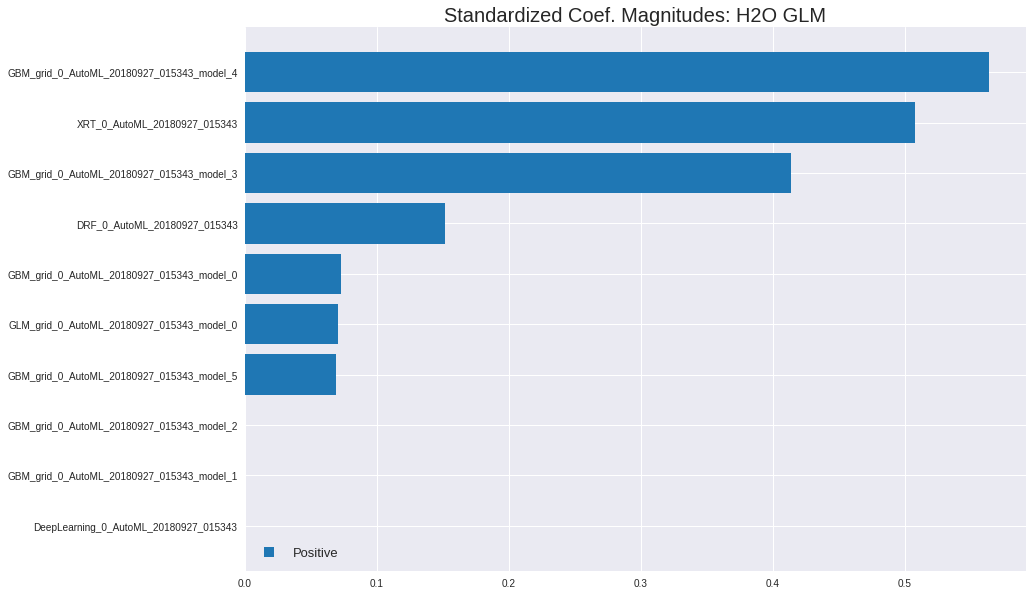

In [15]:
%matplotlib inline
metalearner.std_coef_plot()

## Save Leader Model

There are two ways to save the leader model -- binary format and MOJO format.  If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use.

In [16]:
h2o.save_model(aml.leader, path = "./product_backorders_model_bin")

'/content/product_backorders_model_bin/StackedEnsemble_AllModels_0_AutoML_20180927_015343'

In [17]:
aml.leader.download_mojo(path = "./")

'/content/StackedEnsemble_AllModels_0_AutoML_20180927_015343.zip'